# patient-online-deprivation-score-model-2021-data
#### Developed by: Mary Amanuel
#### Contact: mary.amanuel@nhsx.nhs.uk
#### Created: 4th January 2021
#### Last updated: 4th January 2021


In [1]:
import pandas as pd
import os
import plotly
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
import statsmodels.api as sm



In [2]:
# Import fingertips_py package - This is a python package to interact with Public Health England’s [Fingertips](https://fingertips.phe.org.uk/) data tool. Fingertips is a major repository of population and public health indicators for England.
## https://fingertips-py.readthedocs.io/en/latest/#indices-and-table
## Installing the fingertips_py library (if not already)

!pip install fingertips_py
import fingertips_py

In [3]:
national_gp_profiles = fingertips_py.get_profile_by_name('National General Practice Profiles')
national_gp_profiles

{'Id': 21,
 'Name': 'National General Practice Profiles (supporting indicators)',
 'Key': 'practice-profiles-supporting-indicators',
 'GroupIds': [1200006],
 'GroupMetadata': [{'Id': 1200006,
   'Name': 'National GP Profiles - Supporting Indicators',
   'Sequence': 1,
   'ProfileId': 21,
   'DataAvailable': [{'AreaTypeId': 7, 'IndicatorCount': 20},
    {'AreaTypeId': 165, 'IndicatorCount': 20},
    {'AreaTypeId': 166, 'IndicatorCount': 20},
    {'AreaTypeId': 167, 'IndicatorCount': 20},
    {'AreaTypeId': 204, 'IndicatorCount': 20},
    {'AreaTypeId': 219, 'IndicatorCount': 20},
    {'AreaTypeId': 15, 'IndicatorCount': 9}]}],
 'Visualisations': ['Overview',
  'CompareAreas',
  'AreaProfile',
  'Trends',
  'Definitions',
  'Download'],
 'HasRecentTrends': False,
 'StartValueAxisFromZero': False,
 'IsChangeFromPreviousPeriodShown': False,
 'DefaultAreaTypeId': 15,
 'DefaultTabId': 1,
 'IgnoredSpineChartAreas': ['E06000053', 'E09000001'],
 'OpenInequalitiesOnAreaData': False}

In [4]:
## Check the relevant geographies that can be called upon as area id. For instance, it can be seen that 'General Practice' is 7
fingertips_py.metadata.get_area_types_as_dict()

[{'Id': 3,
  'Name': 'Middle Super Output Area',
  'Short': 'MSOA',
  'Class': None,
  'Sequence': 0,
  'CanBeDisplayedOnMap': True},
 {'Id': 4,
  'Name': 'Lower Super Output Area',
  'Short': 'LSOA',
  'Class': None,
  'Sequence': 0,
  'CanBeDisplayedOnMap': False},
 {'Id': 6,
  'Name': 'Government Office Region',
  'Short': 'Region',
  'Class': None,
  'Sequence': 0,
  'CanBeDisplayedOnMap': True},
 {'Id': 7,
  'Name': 'General Practice',
  'Short': 'GP',
  'Class': None,
  'Sequence': 0,
  'CanBeDisplayedOnMap': True},
 {'Id': 8,
  'Name': 'Ward',
  'Short': 'Ward',
  'Class': None,
  'Sequence': 0,
  'CanBeDisplayedOnMap': True},
 {'Id': 14,
  'Name': 'Acute Trust',
  'Short': 'Acute Trust',
  'Class': None,
  'Sequence': 0,
  'CanBeDisplayedOnMap': False},
 {'Id': 15,
  'Name': 'England',
  'Short': 'England',
  'Class': None,
  'Sequence': 0,
  'CanBeDisplayedOnMap': False},
 {'Id': 20,
  'Name': 'Mental Health Trust',
  'Short': 'Mental Health Trust',
  'Class': None,
  'Sequenc

In [5]:
# Obtain dataframe with metadata on metrics under chosen topic (can instead just navigate website direct)
national_gp_profiles_meta = fingertips_py.get_metadata_for_profile_as_dataframe(national_gp_profiles['Id'])
national_gp_profiles_meta

,Indicator ID,Indicator,Definition,Rationale,Data source,Indicator source,Methodology,Standard population/values,Confidence interval details,Source of numerator,...,Notes,Frequency,Rounding,Indicator Content,Specific rationale,Impact of COVID-19,Unit,Value type,Year type,Polarity
0,337,GP registered population by sex and quinary ag...,Number of males and females registered with a ...,NaN,NHS digital,Data for April of the respective calendar year...,NaN,NaN,NaN,NaN,...,Data are extracted as monthly snapshot in time...,NaN,NaN,NaN,NaN,NaN,NaN,Count,Calendar,Not applicable
1,114,QOF Total List Size,Total number of patients registered with the p...,NaN,"Quality and Outcomes Framework (QOF), NHS Digital",Data for 2020/21 can be downloaded from https...,NaN,NaN,NaN,"Quality and Outcomes Framework (QOF), NHS Digital",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Count,Financial,Not applicable
2,295,Total QOF points,The percentage of all QOF points achieved acro...,NaN,"Quality and Outcomes Framework (QOF), NHS Digital",Data for 2020/21 can be downloaded from https:...,NaN,NaN,NaN,"Quality and Outcomes Framework (QOF), NHS Digital",...,The maximal number of QOF points in 2013/14 wa...,NaN,NaN,NaN,NaN,NHS Digital have stated that changes in QOF du...,%,Proportion,Financial,RAG - High is good
3,650,Life expectancy - MSOA based,Life expectancy at birth. Population weighting...,Life expectancy at birth is chosen as the pref...,"PHE, based on ONS mortality data",http://www.localhealth.org.uk for MSOA life ex...,The life expectancy for the MSOAs where the pr...,NaN,NaN,NaN,...,This indicator was initially calculated for MS...,NaN,NaN,NaN,NaN,NaN,Years,Life expectancy,Calendar,RAG - High is good
4,93438,% who have a positive experience of their GP p...,"Question 30. People were asked: ""Overall, how ...",NaN,GP Patient Survey,http://www.gp-patient.co.uk,NaN,NaN,NaN,NaN,...,The number of this question has changed from 3...,NaN,NaN,NaN,NaN,NaN,%,Proportion,Calendar,BOB - Blue orange blue
5,1679,Ethnicity estimates,Estimated proportion of non-white ethnic group...,NaN,Census 2011(Ethnicity by LSOA); HSCIC: Numbers...,Department of Primary Care and Public Health S...,NaN,NaN,NaN,NaN,...,If an ethnic group's proportion is smaller tha...,NaN,NaN,NaN,NaN,NaN,%,Proportion,Financial,Not applicable
6,93558,IDACI - Income Deprivation Affecting Children ...,This is a subset of the Income Deprivation Dom...,The Income Deprivation Affecting Children Inde...,"Ministry of Housing, Communities & Local Gover...",IDAOPI and IDACI are part of the English Indic...,Where area values have been published in the d...,NaN,NaN,NaN,...,NaN,The indices of deprivation are published in ir...,NaN,NaN,NaN,NaN,NaN,Score,Calendar,RAG - Low is good
7,93559,IDAOPI - Income Deprivation Affecting Older Pe...,This is a subset of the Income Deprivation Dom...,Deprivation is one of the strongest predictors...,"Ministry of Housing, Communities & Local Gover...",The IDACI and IDAOPI are part of the English I...,Where area values have been published in the d...,NaN,NaN,NaN,...,NaN,The indices of deprivation are published in ir...,NaN,NaN,NaN,NaN,NaN,Score,Calendar,RAG - Low is good
8,93553,Deprivation score (IMD 2019),The English Indices of Deprivation 2019 use 39...,Deprivation covers a broad range of issues and...,"Ministry of Housing, Communities & Local Gover...",https://www.gov.uk/government/statistics/engli...,The English Indices of Deprivation 2019 are me...,NaN,NaN,NaN,...,The Indices of Deprivation 2019 are relative m...,NaN,NaN,NaN,NaN,NaN,NaN,Score,Calendar,RAG - Low is good


In [6]:
gp_and_england_deprivation_score = fingertips_py.retrieve_data.get_data_by_indicator_ids(indicator_ids=[93553],area_type_id =[7] ) # 7 for practice (we know this topic area has practice breakdown for sure, by design), 93553 for our metric of interest
gp_and_england_deprivation_score

,Indicator ID,Indicator Name,Parent Code,Parent Name,Area Code,Area Name,Area Type,Sex,Age,Category Type,...,Upper CI 99.8 limit,Count,Denominator,Value note,Recent Trend,Compared to England value or percentiles,Column not used,Time period Sortable,New data,Compared to goal
0,93553,Deprivation score (IMD 2019),NaN,NaN,E92000001,England,England,Persons,All ages,NaN,...,NaN,NaN,NaN,NaN,Cannot be calculated,Not compared,Not compared,20190000,NaN,NaN
1,93553,Deprivation score (IMD 2019),E92000001,England,A81001,The Densham Surgery,GP,Persons,All ages,NaN,...,NaN,NaN,NaN,NaN,Cannot be calculated,Not compared,Not compared,20190000,NaN,NaN
2,93553,Deprivation score (IMD 2019),E92000001,England,A81002,Queens Park Medical Centre,GP,Persons,All ages,NaN,...,NaN,NaN,NaN,NaN,Cannot be calculated,Not compared,Not compared,20190000,NaN,NaN
3,93553,Deprivation score (IMD 2019),E92000001,England,A81004,Bluebell Medical Centre,GP,Persons,All ages,NaN,...,NaN,NaN,NaN,NaN,Cannot be calculated,Not compared,Not compared,20190000,NaN,NaN
4,93553,Deprivation score (IMD 2019),E92000001,England,A81005,Springwood Surgery,GP,Persons,All ages,NaN,...,NaN,NaN,NaN,NaN,Cannot be calculated,Not compared,Not compared,20190000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7603,93553,Deprivation score (IMD 2019),E92000001,England,Y05857,RHND,GP,Persons,All ages,NaN,...,NaN,NaN,NaN,NaN,Cannot be calculated,Not compared,Not compared,20190000,NaN,NaN
7604,93553,Deprivation score (IMD 2019),E92000001,England,Y06007,Wellbourne Healthcare CIC,GP,Persons,All ages,NaN,...,NaN,NaN,NaN,NaN,Cannot be calculated,Not compared,Not compared,20190000,NaN,NaN
7605,93553,Deprivation score (IMD 2019),E92000001,England,Y06113,QHS GP Care Home Service,GP,Persons,All ages,NaN,...,NaN,NaN,NaN,NaN,Cannot be calculated,Not compared,Not compared,20190000,NaN,NaN
7606,93553,Deprivation score (IMD 2019),E92000001,England,Y06218,Brownsover Medical Centre,GP,Persons,All ages,NaN,...,NaN,NaN,NaN,NaN,Cannot be calculated,Not compared,Not compared,20190000,NaN,NaN


In [7]:
gp_and_england_deprivation_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7608 entries, 0 to 7607
Data columns (total 26 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Indicator ID                              7608 non-null   int64  
 1   Indicator Name                            7608 non-null   object 
 2   Parent Code                               7607 non-null   object 
 3   Parent Name                               7607 non-null   object 
 4   Area Code                                 7608 non-null   object 
 5   Area Name                                 7608 non-null   object 
 6   Area Type                                 7608 non-null   object 
 7   Sex                                       7608 non-null   object 
 8   Age                                       7608 non-null   object 
 9   Category Type                             0 non-null      float64
 10  Category                            

In [8]:
gp_and_england_deprivation_score = gp_and_england_deprivation_score[['Area Code', 'Area Name', 'Area Type', 'Time period', 'Value']]
gp_and_england_deprivation_score

,Area Code,Area Name,Area Type,Time period,Value
0,E92000001,England,England,2019,21.722087
1,A81001,The Densham Surgery,GP,2019,32.360939
2,A81002,Queens Park Medical Centre,GP,2019,31.921958
3,A81004,Bluebell Medical Centre,GP,2019,28.024026
4,A81005,Springwood Surgery,GP,2019,15.398207
...,...,...,...,...,...
7603,Y05857,RHND,GP,2019,23.386000
7604,Y06007,Wellbourne Healthcare CIC,GP,2019,44.559787
7605,Y06113,QHS GP Care Home Service,GP,2019,32.817919
7606,Y06218,Brownsover Medical Centre,GP,2019,15.623656


In [9]:
gp_deprivation_score_2019 = gp_and_england_deprivation_score[gp_and_england_deprivation_score['Area Type'].isin(['GP'])]
gp_deprivation_score_2019 = gp_deprivation_score_2019.rename(columns={'Area Code' :'Area_Code', 
                                          'Area Name' : 'GP_Name',
                                          'Area Type' : 'Area_Type',
                                          'Time period' : 'Time_Period', 
                                          'Value' : 'Deprivation_Score_IMD_2019'})
gp_deprivation_score_2019['GP_Name'] = gp_deprivation_score_2019['GP_Name'].str.upper()
gp_deprivation_score_2019

,Area_Code,GP_Name,Area_Type,Time_Period,Deprivation_Score_IMD_2019
1,A81001,THE DENSHAM SURGERY,GP,2019,32.360939
2,A81002,QUEENS PARK MEDICAL CENTRE,GP,2019,31.921958
3,A81004,BLUEBELL MEDICAL CENTRE,GP,2019,28.024026
4,A81005,SPRINGWOOD SURGERY,GP,2019,15.398207
5,A81006,TENNANT STREET MEDICAL PRACTICE,GP,2019,35.612387
...,...,...,...,...,...
7603,Y05857,RHND,GP,2019,23.386000
7604,Y06007,WELLBOURNE HEALTHCARE CIC,GP,2019,44.559787
7605,Y06113,QHS GP CARE HOME SERVICE,GP,2019,32.817919
7606,Y06218,BROWNSOVER MEDICAL CENTRE,GP,2019,15.623656


In [10]:
gp_deprivation_score_2019.describe()

,Time_Period,Deprivation_Score_IMD_2019
count,6980.0,6980.000000
mean,2019.0,23.530374
std,0.0,11.666802
min,2019.0,3.404973
25%,2019.0,14.089732
50%,2019.0,21.576292
75%,2019.0,30.878554
max,2019.0,68.721015


In [11]:
gp_deprivation_score_2019['GP_Rank'] = gp_deprivation_score_2019['Deprivation_Score_IMD_2019'].rank(ascending = False)
gp_deprivation_score_2019

,Area_Code,GP_Name,Area_Type,Time_Period,Deprivation_Score_IMD_2019,GP_Rank
1,A81001,THE DENSHAM SURGERY,GP,2019,32.360939,1520.0
2,A81002,QUEENS PARK MEDICAL CENTRE,GP,2019,31.921958,1587.0
3,A81004,BLUEBELL MEDICAL CENTRE,GP,2019,28.024026,2240.0
4,A81005,SPRINGWOOD SURGERY,GP,2019,15.398207,4884.0
5,A81006,TENNANT STREET MEDICAL PRACTICE,GP,2019,35.612387,1120.0
...,...,...,...,...,...,...
7603,Y05857,RHND,GP,2019,23.386000,3108.0
7604,Y06007,WELLBOURNE HEALTHCARE CIC,GP,2019,44.559787,416.0
7605,Y06113,QHS GP CARE HOME SERVICE,GP,2019,32.817919,1450.0
7606,Y06218,BROWNSOVER MEDICAL CENTRE,GP,2019,15.623656,4832.0


In [12]:
gp_deprivation_score_2019_ranking = gp_deprivation_score_2019.sort_values(by='GP_Rank', ascending=True)
gp_deprivation_score_2019_ranking['Percentile_Rank'] = gp_deprivation_score_2019.Deprivation_Score_IMD_2019.rank(pct = True)
gp_deprivation_score_2019_ranking

,Area_Code,GP_Name,Area_Type,Time_Period,Deprivation_Score_IMD_2019,GP_Rank,Percentile_Rank
6501,N82099,MERE LANE GROUP PRACTICE,GP,2019,68.721015,1.0,1.000000
62,A81621,THORNTREE SURGERY,GP,2019,67.407408,2.0,0.999857
6530,N82669,GREAT HOMER STREET MEDICAL CENTRE,GP,2019,65.248605,3.0,0.999713
6502,N82101,KIRKDALE,GP,2019,65.104433,4.0,0.999570
6523,N82651,STANLEY MEDICAL CENTRE,GP,2019,64.957030,5.0,0.999427
...,...,...,...,...,...,...,...
4968,K82049,HUGHENDEN VALLEY SURGERY,GP,2019,4.174575,6976.0,0.000716
4856,K81028,MAGNOLIA HOUSE SURGERY,GP,2019,4.158261,6977.0,0.000573
4662,J82099,RICHMOND SURGERY,GP,2019,4.151031,6978.0,0.000430
4899,K81092,WOOSEHILL PRACTICE,GP,2019,3.933291,6979.0,0.000287


In [13]:
gp_deprivation_score_2019_ranking['decile'] = pd.qcut(gp_deprivation_score_2019_ranking['Deprivation_Score_IMD_2019'], 10, labels=['10% least deprived', '20% least deprived', '30% least deprived', '40% least deprived', '50% least deprived', '50% most deprived', '40% most deprived', '30% most deprived', '20% most deprived', '10% most deprived'])
gp_deprivation_score_2019_ranking

,Area_Code,GP_Name,Area_Type,Time_Period,Deprivation_Score_IMD_2019,GP_Rank,Percentile_Rank,decile
6501,N82099,MERE LANE GROUP PRACTICE,GP,2019,68.721015,1.0,1.000000,10% most deprived
62,A81621,THORNTREE SURGERY,GP,2019,67.407408,2.0,0.999857,10% most deprived
6530,N82669,GREAT HOMER STREET MEDICAL CENTRE,GP,2019,65.248605,3.0,0.999713,10% most deprived
6502,N82101,KIRKDALE,GP,2019,65.104433,4.0,0.999570,10% most deprived
6523,N82651,STANLEY MEDICAL CENTRE,GP,2019,64.957030,5.0,0.999427,10% most deprived
...,...,...,...,...,...,...,...,...
4968,K82049,HUGHENDEN VALLEY SURGERY,GP,2019,4.174575,6976.0,0.000716,10% least deprived
4856,K81028,MAGNOLIA HOUSE SURGERY,GP,2019,4.158261,6977.0,0.000573,10% least deprived
4662,J82099,RICHMOND SURGERY,GP,2019,4.151031,6978.0,0.000430,10% least deprived
4899,K81092,WOOSEHILL PRACTICE,GP,2019,3.933291,6979.0,0.000287,10% least deprived


### Patient Online [October 2021]
##### Patient Online is an NHS England programme designed to support GP Practices to offer and promote online services to patients, including access to coded information in records, appointment booking and ordering of repeat prescriptions.

##### Data are provided by GP system suppliers to NHS Digital on a monthly basis and published on the 15th working day each month pending no issues, otherwise as soon as possible thereafter.

##### Data: https://digital.nhs.uk/data-and-information/data-collections-and-data-sets/data-collections/pomi

##### Data dictionary:
##### Pat_Appts_Use - Total number of appointment scheduling or cancelling transactions using an Online Patient Transaction Service.	Numeric (integer)

##### Pat_Presc_Use	- Total number of prescriptions ordered using an Online Patient Transaction Service. (Note that ordering several items at once to be counted as one prescription).	Numeric (integer)

##### Total_Use	- The total number of online transactions that have occurred within the reporting month.	Numeric (integer)

In [14]:
POMI = pd.read_csv('data/POMI_APR2021_to_OCT2021.csv', sep = ',')
POMI['report_period_end'] = pd.to_datetime(POMI['report_period_end'])
POMI['ccg_name'] = POMI['ccg_name'].replace(['NHS Herefordshire CCG'],'NHS Herefordshire and Worcestershire CCG')
POMI['ccg_name'] = POMI['ccg_name'].replace(['NHS Herts Valley CCG'],'NHS Herts Valleys CCG')
POMI['ccg_name'] = POMI['ccg_name'].str.upper()
POMI['practice_name'] = POMI['practice_name'].str.upper()
POMI

,report_period_end,region_code,region_name,ccg_code,ccg_name,practice_code,practice_name,system_supplier,field,value
0,2021-04-30,Y56,NaN,36L,NHS SOUTH WEST LONDON CCG,H83001,PORTLAND MEDICAL CENTRE,EMIS,Sys_Presc_Enbld,2.0
1,2021-04-30,Y56,NaN,36L,NHS SOUTH WEST LONDON CCG,H83001,PORTLAND MEDICAL CENTRE,EMIS,patient_list_size,12625.0
2,2021-04-30,Y56,NaN,36L,NHS SOUTH WEST LONDON CCG,H83001,PORTLAND MEDICAL CENTRE,EMIS,Pat_DetCodeRec_Enbld,15.0
3,2021-04-30,Y56,NaN,36L,NHS SOUTH WEST LONDON CCG,H83001,PORTLAND MEDICAL CENTRE,EMIS,Pat_Presc_Enbld,4816.0
4,2021-04-30,Y56,NaN,36L,NHS SOUTH WEST LONDON CCG,H83001,PORTLAND MEDICAL CENTRE,EMIS,New_Pat_Enbld,43.0
...,...,...,...,...,...,...,...,...,...,...
591495,2021-10-31,Y63,NaN,X2C4Y,NHS KIRKLEES CCG,Y06659,NOOK SURGERY,TPP,Sys_Presc_Enbld,2.0
591496,2021-10-31,Y63,NaN,X2C4Y,NHS KIRKLEES CCG,Y06659,NOOK SURGERY,TPP,Pat_Appts_Use,1.0
591497,2021-10-31,Y63,NaN,X2C4Y,NHS KIRKLEES CCG,Y06659,NOOK SURGERY,TPP,Pat_Appts_Enbld,623.0
591498,2021-10-31,Y63,NaN,X2C4Y,NHS KIRKLEES CCG,Y06659,NOOK SURGERY,TPP,Sys_Appts_Enbld,2.0


In [15]:
POMI_pivot =  pd.pivot_table(POMI, index = ['report_period_end', 'practice_name', 'practice_code', 'region_code', ], columns = 'field', values = 'value')
POMI_filter = POMI_pivot.drop(['New_Pat_Enbld','Pat_Appts_Enbld', 'Pat_DetCodeRec_Enbld','Pat_DetCodeRec_Use','Pat_Presc_Enbld','Sys_Appts_Enbld','Sys_DetCodeRec_Enbld','Sys_Presc_Enbld','Total_Pat_Enbld'], axis=1)
POMI_filter = POMI_filter.reset_index()
POMI_filter

field,report_period_end,practice_name,practice_code,region_code,Pat_Appts_Use,Pat_Presc_Use,Total_Use,patient_list_size
0,2021-04-30,(IRLAM) SALFORD CARE CTRS MEDICAL PRACTI,P87657,Y62,0.0,181.0,NaN,2870.0
1,2021-04-30,1/MONTON MEDICAL PRACTICE,P87620,Y62,0.0,520.0,NaN,9557.0
2,2021-04-30,1/SALFORD MEDICAL PRACTICE,P87004,Y62,0.0,251.0,NaN,3929.0
3,2021-04-30,15 SEFTON ROAD,N84035,Y62,0.0,320.0,4447.0,4178.0
4,2021-04-30,168 MEDICAL GROUP,L81051,Y58,0.0,2390.0,23637.0,20563.0
...,...,...,...,...,...,...,...,...
45495,2021-10-31,YORKSHIRE STREET MEDICAL CENTRE,P81008,Y62,NaN,733.0,12140.0,6349.0
45496,2021-10-31,YOXALL,M83013,Y60,NaN,725.0,16996.0,4700.0
45497,2021-10-31,ZAIN MEDICAL CENTRE,E84653,Y56,NaN,103.0,2255.0,3037.0
45498,2021-10-31,ZAMAN,P92005,Y62,45.0,474.0,1372.0,4148.0


In [16]:
patient_list_size_check = POMI_filter[['report_period_end','patient_list_size']].groupby('report_period_end').sum()
patient_list_size_check 

field,patient_list_size
report_period_end,
2021-04-30,60396758.0
2021-05-31,60494057.0
2021-06-30,60518730.0
2021-07-31,60527554.0
2021-08-31,60741387.0
2021-09-30,60778650.0
2021-10-31,60856945.0


In [17]:
POMI_filter['report_period_end'] = pd.to_datetime(POMI_filter['report_period_end'])
POMI_filter.dtypes

field
report_period_end    datetime64[ns]
practice_name                object
practice_code                object
region_code                  object
Pat_Appts_Use               float64
Pat_Presc_Use               float64
Total_Use                   float64
patient_list_size           float64
dtype: object

In [18]:
POMI_sept_2021 = POMI_filter[POMI_filter['report_period_end'] == '2021-09-30']
POMI_sept_2021

field,report_period_end,practice_name,practice_code,region_code,Pat_Appts_Use,Pat_Presc_Use,Total_Use,patient_list_size
32545,2021-09-30,(IRLAM) SALFORD CARE CTRS MEDICAL PRACTI,P87657,Y62,0.0,208.0,NaN,2908.0
32546,2021-09-30,1/MONTON MEDICAL PRACTICE,P87620,Y62,9.0,643.0,NaN,9587.0
32547,2021-09-30,1/SALFORD MEDICAL PRACTICE,P87004,Y62,1.0,264.0,NaN,5510.0
32548,2021-09-30,15 SEFTON ROAD,N84035,Y62,0.0,414.0,7822.0,4120.0
32549,2021-09-30,168 MEDICAL GROUP,L81051,Y58,0.0,2684.0,48056.0,20878.0
...,...,...,...,...,...,...,...,...
39022,2021-09-30,YORKSHIRE STREET MEDICAL CENTRE,P81008,Y62,0.0,744.0,10108.0,6343.0
39023,2021-09-30,YOXALL,M83013,Y60,0.0,736.0,13624.0,4718.0
39024,2021-09-30,ZAIN MEDICAL CENTRE,E84653,Y56,0.0,88.0,2582.0,3031.0
39025,2021-09-30,ZAMAN,P92005,Y62,6.0,501.0,1176.0,4149.0


In [19]:
POMI_sept_2021_gp = POMI_sept_2021[['practice_name', 'practice_code', 'Pat_Appts_Use', 'Pat_Presc_Use', 'Total_Use', 'patient_list_size']].groupby(['practice_code', 'practice_name']).sum()
POMI_sept_2021_gp = POMI_sept_2021.reset_index()
POMI_sept_2021_gp


field,index,report_period_end,practice_name,practice_code,region_code,Pat_Appts_Use,Pat_Presc_Use,Total_Use,patient_list_size
0,32545,2021-09-30,(IRLAM) SALFORD CARE CTRS MEDICAL PRACTI,P87657,Y62,0.0,208.0,NaN,2908.0
1,32546,2021-09-30,1/MONTON MEDICAL PRACTICE,P87620,Y62,9.0,643.0,NaN,9587.0
2,32547,2021-09-30,1/SALFORD MEDICAL PRACTICE,P87004,Y62,1.0,264.0,NaN,5510.0
3,32548,2021-09-30,15 SEFTON ROAD,N84035,Y62,0.0,414.0,7822.0,4120.0
4,32549,2021-09-30,168 MEDICAL GROUP,L81051,Y58,0.0,2684.0,48056.0,20878.0
...,...,...,...,...,...,...,...,...,...
6477,39022,2021-09-30,YORKSHIRE STREET MEDICAL CENTRE,P81008,Y62,0.0,744.0,10108.0,6343.0
6478,39023,2021-09-30,YOXALL,M83013,Y60,0.0,736.0,13624.0,4718.0
6479,39024,2021-09-30,ZAIN MEDICAL CENTRE,E84653,Y56,0.0,88.0,2582.0,3031.0
6480,39025,2021-09-30,ZAMAN,P92005,Y62,6.0,501.0,1176.0,4149.0


In [20]:
patient_list_size_check_POMI_sept_2021_gp = POMI_sept_2021_gp['patient_list_size'].sum()
patient_list_size_check_POMI_sept_2021_gp

60778650.0

### "Patient Online" transactions per 1000 patients

In [21]:
POMI_sept_2021_gp['Pat_Presc_Use_per_1000'] = (POMI_sept_2021_gp['Pat_Presc_Use'] / POMI_sept_2021_gp['patient_list_size']) * 1000
POMI_sept_2021_gp['Pat_Appts_Use_per_1000'] = (POMI_sept_2021_gp['Pat_Appts_Use'] / POMI_sept_2021_gp['patient_list_size']) * 1000
POMI_sept_2021_gp_per_1000 = POMI_sept_2021_gp.round(2)
POMI_sept_2021_gp_per_1000

field,index,report_period_end,practice_name,practice_code,region_code,Pat_Appts_Use,Pat_Presc_Use,Total_Use,patient_list_size,Pat_Presc_Use_per_1000,Pat_Appts_Use_per_1000
0,32545,2021-09-30,(IRLAM) SALFORD CARE CTRS MEDICAL PRACTI,P87657,Y62,0.0,208.0,NaN,2908.0,71.53,0.00
1,32546,2021-09-30,1/MONTON MEDICAL PRACTICE,P87620,Y62,9.0,643.0,NaN,9587.0,67.07,0.94
2,32547,2021-09-30,1/SALFORD MEDICAL PRACTICE,P87004,Y62,1.0,264.0,NaN,5510.0,47.91,0.18
3,32548,2021-09-30,15 SEFTON ROAD,N84035,Y62,0.0,414.0,7822.0,4120.0,100.49,0.00
4,32549,2021-09-30,168 MEDICAL GROUP,L81051,Y58,0.0,2684.0,48056.0,20878.0,128.56,0.00
...,...,...,...,...,...,...,...,...,...,...,...
6477,39022,2021-09-30,YORKSHIRE STREET MEDICAL CENTRE,P81008,Y62,0.0,744.0,10108.0,6343.0,117.29,0.00
6478,39023,2021-09-30,YOXALL,M83013,Y60,0.0,736.0,13624.0,4718.0,156.00,0.00
6479,39024,2021-09-30,ZAIN MEDICAL CENTRE,E84653,Y56,0.0,88.0,2582.0,3031.0,29.03,0.00
6480,39025,2021-09-30,ZAMAN,P92005,Y62,6.0,501.0,1176.0,4149.0,120.75,1.45


In [22]:
GP_POMI_IMD = gp_deprivation_score_2019_ranking.merge(POMI_sept_2021_gp_per_1000, left_on='Area_Code', right_on ='practice_code')
GP_POMI_IMD

,Area_Code,GP_Name,Area_Type,Time_Period,Deprivation_Score_IMD_2019,GP_Rank,Percentile_Rank,decile,index,report_period_end,practice_name,practice_code,region_code,Pat_Appts_Use,Pat_Presc_Use,Total_Use,patient_list_size,Pat_Presc_Use_per_1000,Pat_Appts_Use_per_1000
0,N82099,MERE LANE GROUP PRACTICE,GP,2019,68.721015,1.0,1.000000,10% most deprived,35850,2021-09-30,MERE LANE GROUP PRACTICE,N82099,Y62,0.0,405.0,17826.0,8104.0,49.98,0.00
1,A81621,THORNTREE SURGERY,GP,2019,67.407408,2.0,0.999857,10% most deprived,38350,2021-09-30,THORNTREE SURGERY,A81621,Y63,0.0,76.0,339.0,2448.0,31.05,0.00
2,N82669,GREAT HOMER STREET MEDICAL CENTRE,GP,2019,65.248605,3.0,0.999713,10% most deprived,34690,2021-09-30,GREAT HOMER STREET MEDICAL CENTRE,N82669,Y62,41.0,320.0,5381.0,3255.0,98.31,12.60
3,N82101,KIRKDALE,GP,2019,65.104433,4.0,0.999570,10% most deprived,35384,2021-09-30,KIRKDALE MEDICAL CENTRE,N82101,Y62,21.0,180.0,3106.0,2631.0,68.42,7.98
4,N82651,STANLEY MEDICAL CENTRE,GP,2019,64.957030,5.0,0.999427,10% most deprived,37364,2021-09-30,STANLEY MEDICAL CENTRE,N82651,Y62,0.0,172.0,4081.0,4399.0,39.10,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6466,K82049,HUGHENDEN VALLEY SURGERY,GP,2019,4.174575,6976.0,0.000716,10% least deprived,35178,2021-09-30,HUGHENDEN VALLEY SURGERY,K82049,Y59,1998.0,1863.0,51525.0,12553.0,148.41,159.17
6467,K81028,MAGNOLIA HOUSE SURGERY,GP,2019,4.158261,6977.0,0.000573,10% least deprived,35683,2021-09-30,MAGNOLIA HOUSE SURGERY,K81028,Y59,0.0,767.0,23057.0,9096.0,84.32,0.00
6468,J82099,RICHMOND SURGERY,GP,2019,4.151031,6978.0,0.000430,10% least deprived,36753,2021-09-30,RICHMOND SURGERY,J82099,Y59,426.0,1016.0,52175.0,14604.0,69.57,29.17
6469,K81092,WOOSEHILL PRACTICE,GP,2019,3.933291,6979.0,0.000287,10% least deprived,38979,2021-09-30,WOOSEHILL PRACTICE,K81092,Y59,64.0,1344.0,48574.0,14183.0,94.76,4.51


In [23]:
gp_patient_online_deprivation = GP_POMI_IMD.drop(columns=['index'])
gp_patient_online_deprivation

,Area_Code,GP_Name,Area_Type,Time_Period,Deprivation_Score_IMD_2019,GP_Rank,Percentile_Rank,decile,report_period_end,practice_name,practice_code,region_code,Pat_Appts_Use,Pat_Presc_Use,Total_Use,patient_list_size,Pat_Presc_Use_per_1000,Pat_Appts_Use_per_1000
0,N82099,MERE LANE GROUP PRACTICE,GP,2019,68.721015,1.0,1.000000,10% most deprived,2021-09-30,MERE LANE GROUP PRACTICE,N82099,Y62,0.0,405.0,17826.0,8104.0,49.98,0.00
1,A81621,THORNTREE SURGERY,GP,2019,67.407408,2.0,0.999857,10% most deprived,2021-09-30,THORNTREE SURGERY,A81621,Y63,0.0,76.0,339.0,2448.0,31.05,0.00
2,N82669,GREAT HOMER STREET MEDICAL CENTRE,GP,2019,65.248605,3.0,0.999713,10% most deprived,2021-09-30,GREAT HOMER STREET MEDICAL CENTRE,N82669,Y62,41.0,320.0,5381.0,3255.0,98.31,12.60
3,N82101,KIRKDALE,GP,2019,65.104433,4.0,0.999570,10% most deprived,2021-09-30,KIRKDALE MEDICAL CENTRE,N82101,Y62,21.0,180.0,3106.0,2631.0,68.42,7.98
4,N82651,STANLEY MEDICAL CENTRE,GP,2019,64.957030,5.0,0.999427,10% most deprived,2021-09-30,STANLEY MEDICAL CENTRE,N82651,Y62,0.0,172.0,4081.0,4399.0,39.10,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6466,K82049,HUGHENDEN VALLEY SURGERY,GP,2019,4.174575,6976.0,0.000716,10% least deprived,2021-09-30,HUGHENDEN VALLEY SURGERY,K82049,Y59,1998.0,1863.0,51525.0,12553.0,148.41,159.17
6467,K81028,MAGNOLIA HOUSE SURGERY,GP,2019,4.158261,6977.0,0.000573,10% least deprived,2021-09-30,MAGNOLIA HOUSE SURGERY,K81028,Y59,0.0,767.0,23057.0,9096.0,84.32,0.00
6468,J82099,RICHMOND SURGERY,GP,2019,4.151031,6978.0,0.000430,10% least deprived,2021-09-30,RICHMOND SURGERY,J82099,Y59,426.0,1016.0,52175.0,14604.0,69.57,29.17
6469,K81092,WOOSEHILL PRACTICE,GP,2019,3.933291,6979.0,0.000287,10% least deprived,2021-09-30,WOOSEHILL PRACTICE,K81092,Y59,64.0,1344.0,48574.0,14183.0,94.76,4.51


In [24]:
gp_patient_online_deprivation.to_csv('gp_patient_online_deprivation.csv')

In [25]:
GP_POMI_IMD.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6471 entries, 0 to 6470
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Area_Code                   6471 non-null   object        
 1   GP_Name                     6471 non-null   object        
 2   Area_Type                   6471 non-null   object        
 3   Time_Period                 6471 non-null   int64         
 4   Deprivation_Score_IMD_2019  6471 non-null   float64       
 5   GP_Rank                     6471 non-null   float64       
 6   Percentile_Rank             6471 non-null   float64       
 7   decile                      6471 non-null   category      
 8   index                       6471 non-null   int64         
 9   report_period_end           6471 non-null   datetime64[ns]
 10  practice_name               6471 non-null   object        
 11  practice_code               6471 non-null   object      

In [26]:
# These GP practices are missing from Fingertips / The English Indices of Deprivation 2019 Dataframe so are exlucded from our analysis
missing_gps = pd.merge(POMI_sept_2021_gp_per_1000, 
                    GP_POMI_IMD,
                     how = 'outer',
                     left_on = 'practice_code',
                     right_on = 'Area_Code', 
                     indicator = True)

deleted_rows = missing_gps.loc[missing_gps._merge == "left_only",]
deleted_rows

,index_x,report_period_end_x,practice_name_x,practice_code_x,region_code_x,Pat_Appts_Use_x,Pat_Presc_Use_x,Total_Use_x,patient_list_size_x,Pat_Presc_Use_per_1000_x,...,practice_name_y,practice_code_y,region_code_y,Pat_Appts_Use_y,Pat_Presc_Use_y,Total_Use_y,patient_list_size_y,Pat_Presc_Use_per_1000_y,Pat_Appts_Use_per_1000_y,_merge
286,32831,2021-09-30,BABYLON GP AT HAND BIRMINGHAM,Y06487,Y56,0.0,12.0,805.0,4747.0,2.53,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
484,33029,2021-09-30,BILBOROUGH MEDICAL CENTRE,Y06356,Y60,671.0,347.0,2694.0,10767.0,32.23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
685,33230,2021-09-30,BROAD OAK MEDICAL PRACTICE,Y06792,Y60,14.0,207.0,565.0,5885.0,35.17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
702,33247,2021-09-30,BROMLEAG CARE PRACTICE,Y06345,Y56,0.0,1072.0,5086.0,1207.0,888.15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
2408,34953,2021-09-30,HEATH STREET HEALTH CENTRE,Y06378,Y60,0.0,26.0,2569.0,6141.0,4.23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
2882,35427,2021-09-30,LAMBETH HEALTHCARE PRACTICE,Y07020,Y56,0.0,0.0,0.0,379.0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
3565,36110,2021-09-30,NOOK SURGERY,Y06659,Y63,254.0,216.0,743.0,3318.0,65.10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
3895,36440,2021-09-30,PEACOCK HEALTHCARE,Y06507,Y60,247.0,885.0,1988.0,5575.0,158.74,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
4436,36981,2021-09-30,SHAKESPEARE ROAD MEDICAL PRACTICE,Y07014,Y59,0.0,394.0,24769.0,13466.0,29.26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
6262,38807,2021-09-30,WHITEHOUSE HEALTH CENTRE,Y06810,Y61,0.0,553.0,5762.0,4113.0,134.45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [27]:
print(GP_POMI_IMD.isnull().sum()) 

Area_Code                      0
GP_Name                        0
Area_Type                      0
Time_Period                    0
Deprivation_Score_IMD_2019     0
GP_Rank                        0
Percentile_Rank                0
decile                         0
index                          0
report_period_end              0
practice_name                  0
practice_code                  0
region_code                    0
Pat_Appts_Use                  1
Pat_Presc_Use                  0
Total_Use                     73
patient_list_size              0
Pat_Presc_Use_per_1000         0
Pat_Appts_Use_per_1000         1
dtype: int64


In [28]:
# Deprivation_Score_IMD_2019 vs Pat_Presc_Use_per_1000

In [29]:
# Exploratory Data Analysis

In [30]:
GP_POMI_IMD.describe()

,Time_Period,Deprivation_Score_IMD_2019,GP_Rank,Percentile_Rank,index,Pat_Appts_Use,Pat_Presc_Use,Total_Use,patient_list_size,Pat_Presc_Use_per_1000,Pat_Appts_Use_per_1000
count,6471.0,6471.000000,6471.000000,6471.000000,6471.000000,6470.000000,6471.000000,6398.000000,6471.000000,6471.000000,6470.000000
mean,2019.0,23.392860,3515.709009,0.496460,35786.080977,169.578516,828.918560,14317.786808,9381.960902,85.246246,15.048839
std,0.0,11.643011,2008.039691,0.287685,1870.843335,410.012904,831.808445,18155.725385,6250.531836,56.300099,30.648513
min,2019.0,3.404973,1.000000,0.000143,32545.000000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000
25%,2019.0,14.026253,1793.500000,0.247779,34166.500000,0.000000,275.000000,3117.000000,5293.500000,41.575000,0.000000
50%,2019.0,21.365090,3527.000000,0.494842,35786.000000,8.000000,598.000000,7933.000000,8138.000000,76.220000,1.090000
75%,2019.0,30.538061,5251.500000,0.743195,37406.500000,151.000000,1109.000000,18922.750000,11876.000000,119.130000,16.685000
max,2019.0,68.721015,6980.000000,1.000000,39026.000000,9535.000000,10547.000000,240799.000000,102675.000000,931.690000,562.940000


In [31]:
GP_POMI_IMD.describe(include='object')

,Area_Code,GP_Name,Area_Type,practice_name,practice_code,region_code
count,6471,6471,6471,6471,6471,6471
unique,6471,6131,1,6125,6471,7
top,L81050,HIGH STREET SURGERY,GP,HIGH STREET SURGERY,L81050,Y60
freq,1,8,6471,8,1,1275


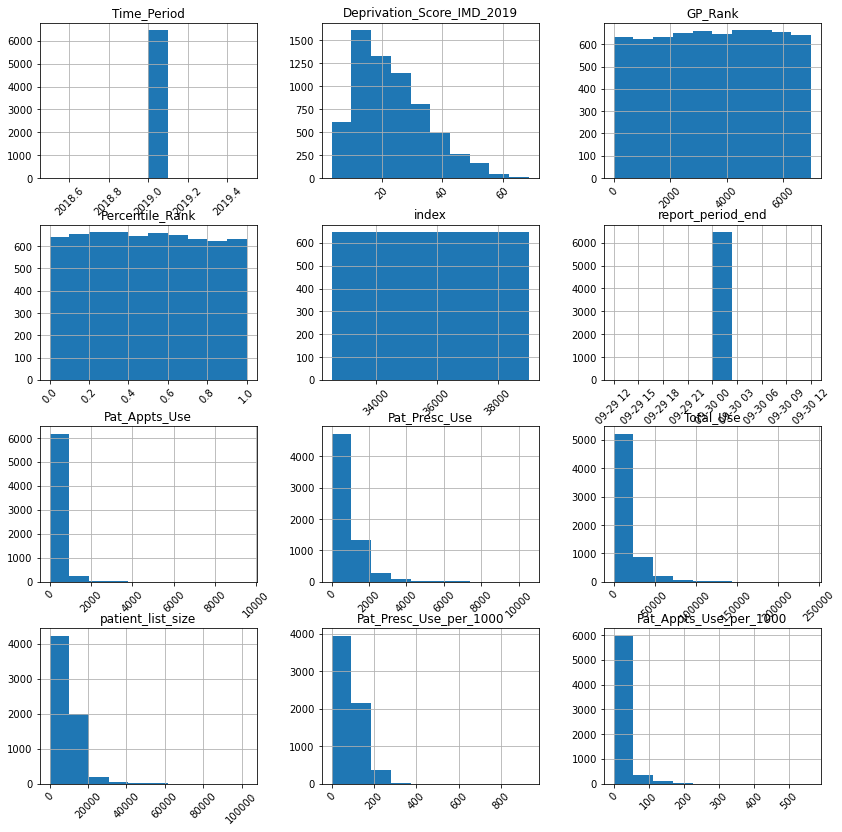

In [32]:
GP_POMI_IMD.hist(figsize=(14,14), xrot=45)
plt.show()

<AxesSubplot:xlabel='decile', ylabel='Pat_Presc_Use_per_1000'>

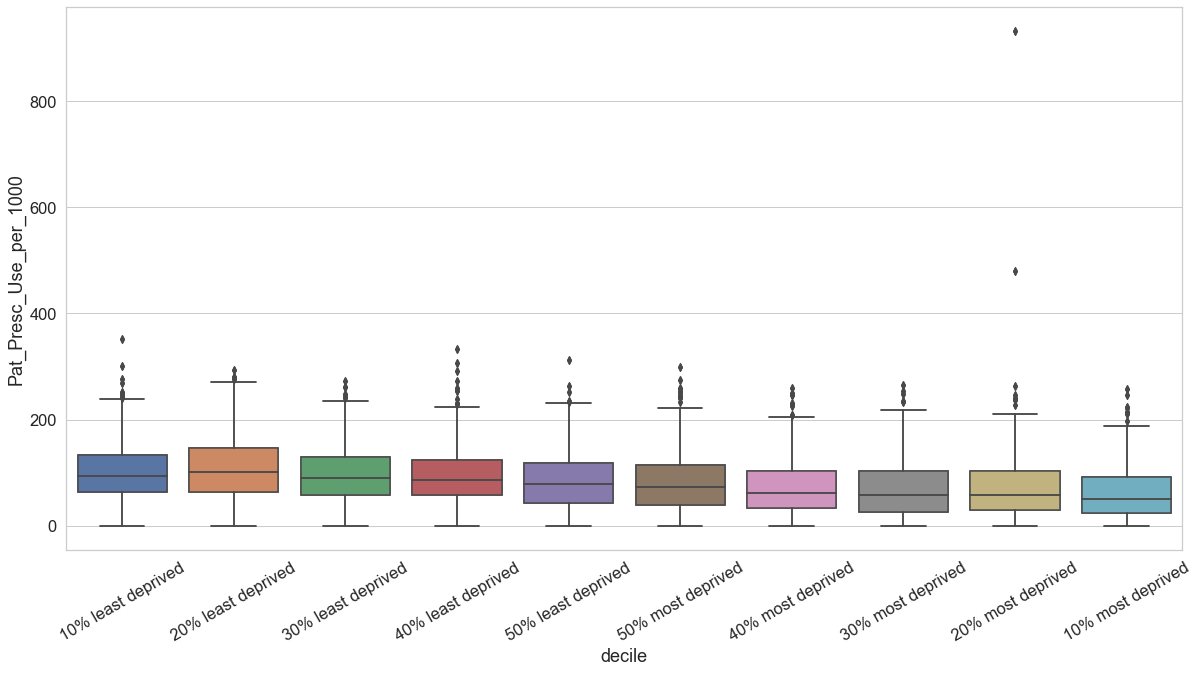

In [33]:
import seaborn as sns
%matplotlib inline

sns.set(rc={'figure.figsize':(20,10)}, font_scale=1.5, style='whitegrid')
ax = sns.boxplot(x = 'decile', y = 'Pat_Presc_Use_per_1000', data = GP_POMI_IMD)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)

sns.boxplot(x = 'decile', y = 'Pat_Presc_Use_per_1000', data = GP_POMI_IMD)


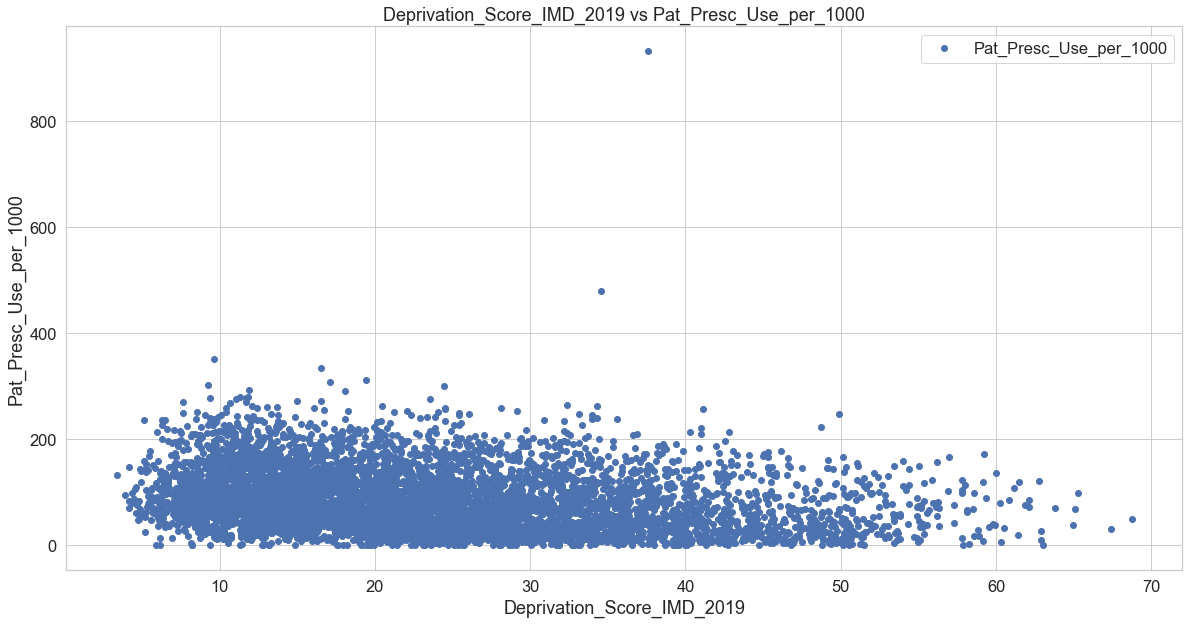

In [53]:
GP_POMI_IMD.plot(x='Deprivation_Score_IMD_2019', y='Pat_Presc_Use_per_1000', style='o')  
plt.title('Deprivation_Score_IMD_2019 vs Pat_Presc_Use_per_1000')  
plt.xlabel('Deprivation_Score_IMD_2019')  
plt.ylabel('Pat_Presc_Use_per_1000')  
plt.show()

<Figure size 1440x720 with 0 Axes>

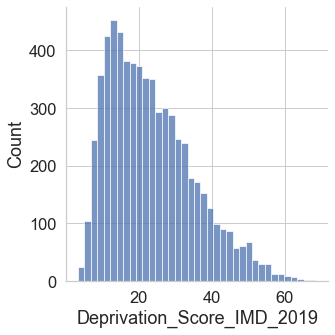

In [54]:
plt.figure(figsize=(20,10))
plt.tight_layout()
seabornInstance.displot(GP_POMI_IMD['Deprivation_Score_IMD_2019'])

<AxesSubplot:xlabel='Deprivation_Score_IMD_2019'>

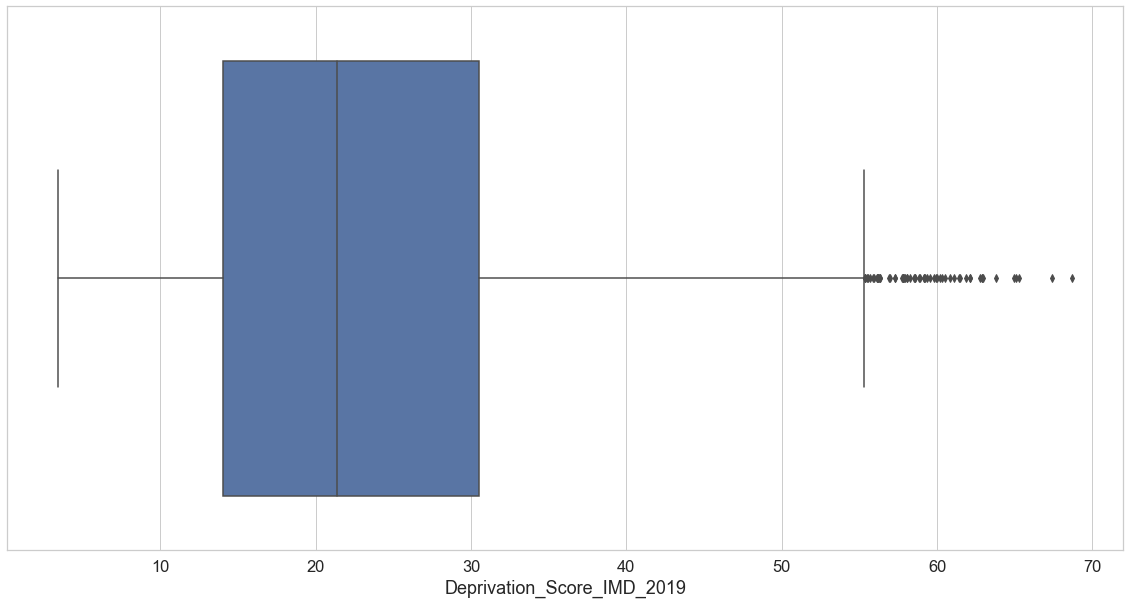

In [55]:
sns.boxplot(x=GP_POMI_IMD['Deprivation_Score_IMD_2019'])

<AxesSubplot:xlabel='Pat_Presc_Use_per_1000'>

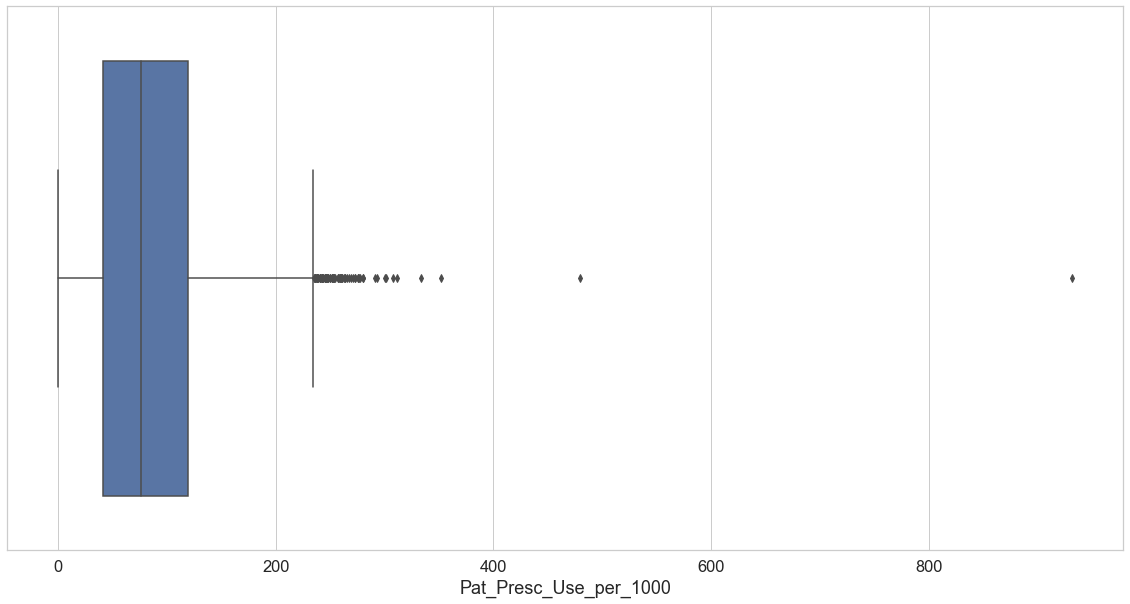

In [56]:
sns.boxplot(x=GP_POMI_IMD['Pat_Presc_Use_per_1000'])

In [57]:
Q1 = GP_POMI_IMD.quantile(0.25)
Q3 = GP_POMI_IMD.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Time_Period                              0.000000
Deprivation_Score_IMD_2019              16.511809
GP_Rank                               3458.000000
Percentile_Rank                          0.495415
index                                 3240.000000
Pat_Appts_Use                          151.000000
Pat_Presc_Use                          834.000000
Total_Use                            15805.750000
patient_list_size                     6582.500000
Pat_Presc_Use_per_1000                  77.555000
Pat_Appts_Use_per_1000                  16.685000
Top_20_Pct_Pat_Presc_Use_per_1000        0.000000
dtype: float64


In [58]:
### Correlation Heatmap

In [59]:
corrs = GP_POMI_IMD.corr()
corrs

,Time_Period,Deprivation_Score_IMD_2019,GP_Rank,Percentile_Rank,index,Pat_Appts_Use,Pat_Presc_Use,Total_Use,patient_list_size,Pat_Presc_Use_per_1000,Pat_Appts_Use_per_1000,Top_20_Pct_Pat_Presc_Use_per_1000
Time_Period,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Deprivation_Score_IMD_2019,NaN,1.000000,-0.966941,0.966941,-0.032085,-0.153829,-0.231024,-0.213735,-0.161998,-0.241707,-0.167514,-0.143397
GP_Rank,NaN,-0.966941,1.000000,-1.000000,0.028202,0.155199,0.234520,0.220085,0.149596,0.252164,0.171512,0.149980
Percentile_Rank,NaN,0.966941,-1.000000,1.000000,-0.028202,-0.155199,-0.234520,-0.220085,-0.149596,-0.252164,-0.171512,-0.149980
index,NaN,-0.032085,0.028202,-0.028202,1.000000,0.004641,0.012476,0.021566,0.027353,-0.005668,-0.002882,-0.015095
Pat_Appts_Use,NaN,-0.153829,0.155199,-0.155199,0.004641,1.000000,0.457087,0.162221,0.390864,0.216357,0.843827,0.169699
Pat_Presc_Use,NaN,-0.231024,0.234520,-0.234520,0.012476,0.457087,1.000000,0.384044,0.683368,0.651520,0.273601,0.515406
Total_Use,NaN,-0.213735,0.220085,-0.220085,0.021566,0.162221,0.384044,1.000000,0.571079,0.052657,0.039977,-0.005687
patient_list_size,NaN,-0.161998,0.149596,-0.149596,0.027353,0.390864,0.683368,0.571079,1.000000,0.082821,0.148162,0.039731
Pat_Presc_Use_per_1000,NaN,-0.241707,0.252164,-0.252164,-0.005668,0.216357,0.651520,0.052657,0.082821,1.000000,0.256419,0.770472


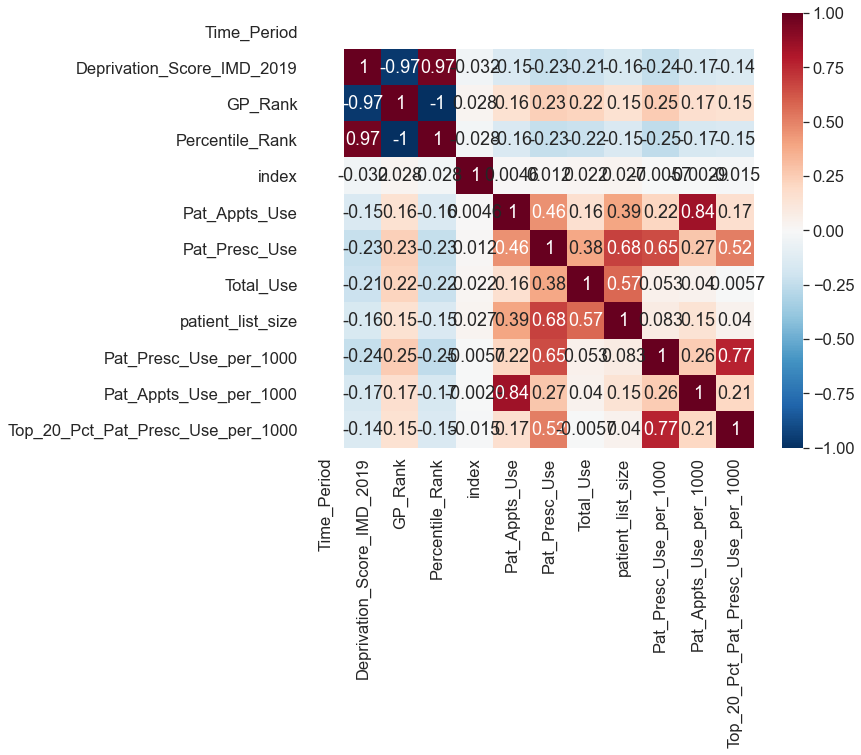

In [60]:
plt.figure(figsize=(10,8))
sns.heatmap(corrs, cmap='RdBu_r', annot=True)
plt.show()

#### [ALL GPS] Deprivation_Score_IMD vs Pat_Presc_Use_per_1000 in 2021

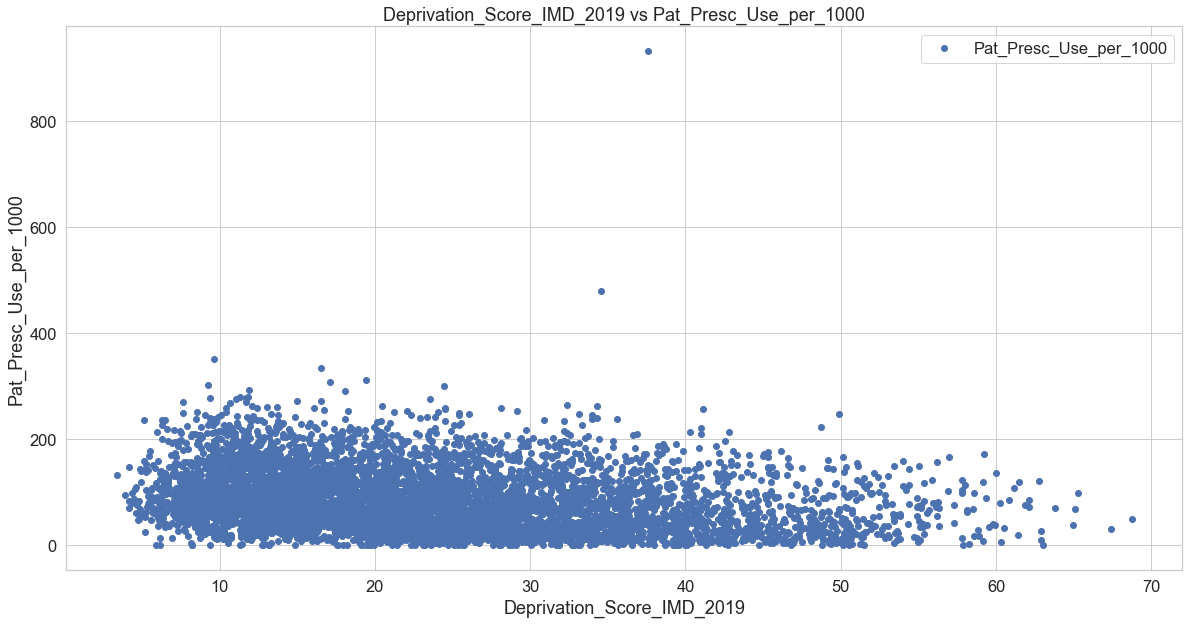

In [63]:
GP_POMI_IMD.plot(x='Deprivation_Score_IMD_2019', y='Pat_Presc_Use_per_1000', style='o')  
plt.title('Deprivation_Score_IMD_2019 vs Pat_Presc_Use_per_1000')  
plt.xlabel('Deprivation_Score_IMD_2019')  
plt.ylabel('Pat_Presc_Use_per_1000')  
plt.show()

In [64]:
X = GP_POMI_IMD['Deprivation_Score_IMD_2019'].values.reshape(-1,1)
y = GP_POMI_IMD['Pat_Presc_Use_per_1000'].values.reshape(-1,1)

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [66]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression()

In [67]:
#To retrieve the intercept:
print(regressor.intercept_)

#For retrieving the slope:
print(regressor.coef_)

[113.2210839]
[[-1.20229238]]


In [68]:
y_pred = regressor.predict(X_test)

In [69]:
actual_vs_predicted = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
actual_vs_predicted

,Actual,Predicted
0,101.72,93.066754
1,106.96,88.572189
2,177.44,80.661435
3,36.84,49.453506
4,131.91,71.628048
...,...,...
1290,11.36,78.161915
1291,132.36,97.320792
1292,41.13,90.705972
1293,91.72,96.213318


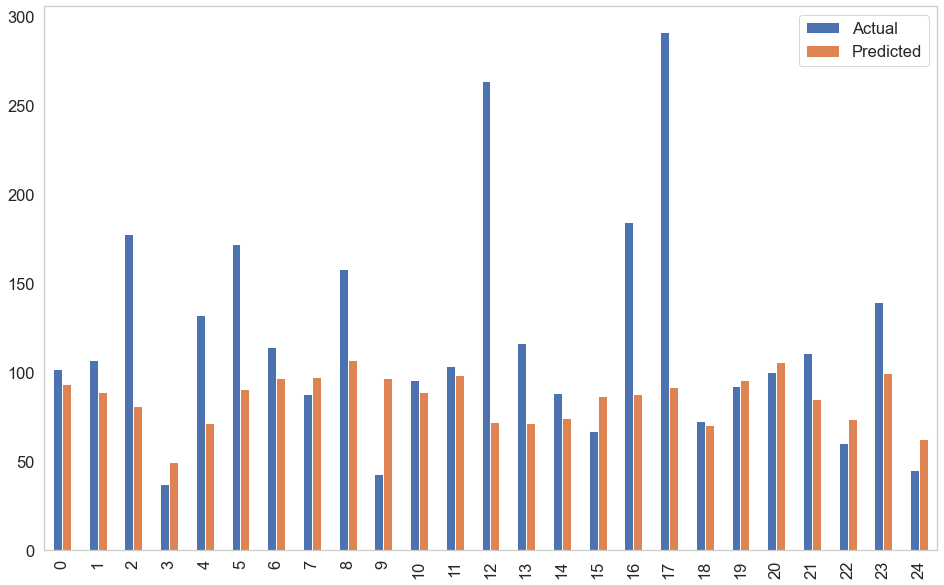

In [70]:
actual_vs_predicted_viz= actual_vs_predicted.head(25)
actual_vs_predicted_viz.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

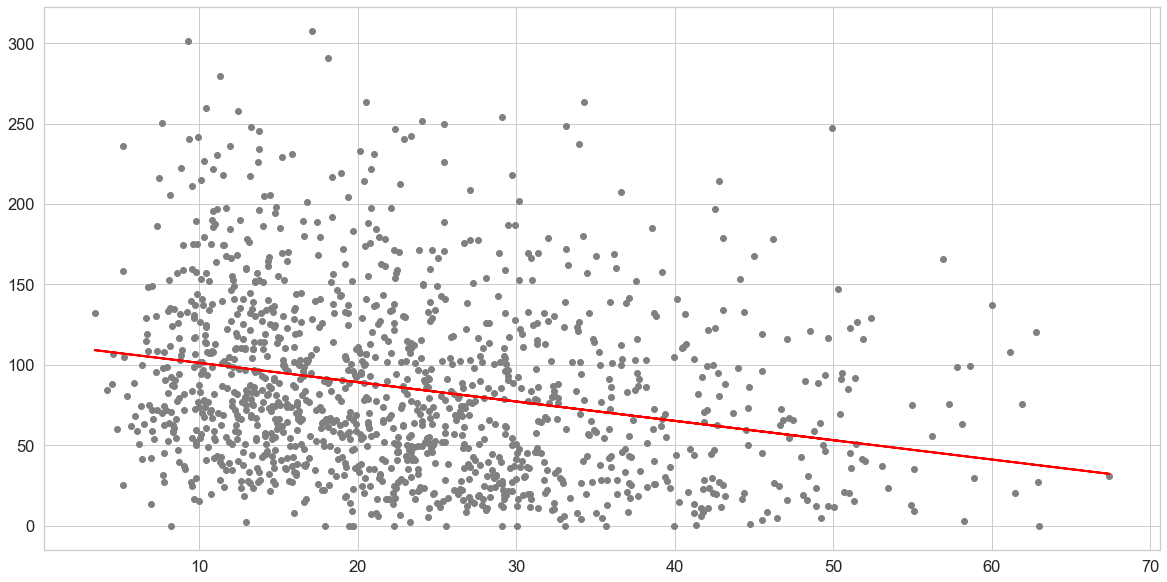

In [71]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [72]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 43.312941847048926
Mean Squared Error: 2970.515630326451
Root Mean Squared Error: 54.50243692098961


In [73]:
#### [TOP 20% GPs for using POMI Prescriptions service per capita] Deprivation_Score_IMD_2019 vs Pat_Presc_Use_per_1000

In [75]:
total_rows = len(GP_POMI_IMD.index) 
Top_20_Pct_GP_Pat_Presc_per_1000 = int(round(total_rows * 0.2,0))
Top_20_Pct_GP_Pat_Presc_per_1000

1294

In [77]:
GP_POMI_IMD.nlargest(Top_20_Pct_GP_Pat_Presc_per_1000,['Pat_Presc_Use_per_1000'])

,Area_Code,GP_Name,Area_Type,Time_Period,Deprivation_Score_IMD_2019,GP_Rank,Percentile_Rank,decile,index,report_period_end,practice_name,practice_code,region_code,Pat_Appts_Use,Pat_Presc_Use,Total_Use,patient_list_size,Pat_Presc_Use_per_1000,Pat_Appts_Use_per_1000,Top_20_Pct_Pat_Presc_Use_per_1000
838,Y02625,CARE HOMES MEDICAL PRACTICE,GP,2019,37.569082,923.0,0.867908,20% most deprived,33388,2021-09-30,CARE HOMES MEDICAL PRACTICE,Y02625,Y62,0.0,982.0,982.0,1054.0,931.69,0.00,1
1113,Y00050,PENNINGTON PARK SURGERY,GP,2019,34.545184,1240.0,0.822493,20% most deprived,36479,2021-09-30,PENNINGTON PARK SURGERY,Y00050,Y62,17.0,1060.0,1659.0,2212.0,479.20,7.69,1
5922,E81024,SHARNBROOK SURGERY,GP,2019,9.668429,6384.0,0.085530,10% least deprived,36986,2021-09-30,SHARNBROOK SURGERY,E81024,Y61,11.0,2050.0,3670.0,5827.0,351.81,1.89,1
4241,L83020,AXMINSTER MEDICAL PRACTICE,GP,2019,16.506292,4604.0,0.340544,40% least deprived,32824,2021-09-30,AXMINSTER MEDICAL PRACTICE,L83020,Y58,0.0,4130.0,7001.0,12371.0,333.85,0.00,1
3644,A83035,THE WEARDALE PRACTICE,GP,2019,19.454992,3965.0,0.432092,50% least deprived,38284,2021-09-30,THE WEARDALE PRACTICE,A83035,Y63,389.0,2241.0,4552.0,7188.0,311.77,54.12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,N84034,PARK STREET SURGERY,GP,2019,53.022556,105.0,0.985100,10% most deprived,36372,2021-09-30,PARK STREET SURGERY,N84034,Y62,0.0,760.0,17361.0,5826.0,130.45,0.00,1
1362,N83045,NEWTON MEDICAL CENTRE,GP,2019,32.386735,1514.0,0.783238,30% most deprived,36096,2021-09-30,NEWTON MEDICAL CENTRE,N83045,Y62,0.0,626.0,16347.0,4799.0,130.44,0.00,1
2946,P81701,DR DAWOUD'S SURGERY,GP,2019,22.844525,3221.0,0.538682,50% most deprived,34040,2021-09-30,DR DAWOUD'S SURGERY,P81701,Y62,14.0,388.0,5921.0,2976.0,130.38,4.70,1
3350,A83054,SKERNE MEDICAL GROUP,GP,2019,20.818309,3647.0,0.477650,50% least deprived,37062,2021-09-30,SKERNE MEDICAL GROUP,A83054,Y63,394.0,2059.0,4357.0,15796.0,130.35,24.94,1


In [79]:
GP_POMI_IMD['Top_20_Pct_Pat_Presc_Use_per_1000'] = [1 if x >= 93.97 else 0 for x in GP_POMI_IMD['Pat_Presc_Use_per_1000']]
GP_POMI_IMD

,Area_Code,GP_Name,Area_Type,Time_Period,Deprivation_Score_IMD_2019,GP_Rank,Percentile_Rank,decile,index,report_period_end,practice_name,practice_code,region_code,Pat_Appts_Use,Pat_Presc_Use,Total_Use,patient_list_size,Pat_Presc_Use_per_1000,Pat_Appts_Use_per_1000,Top_20_Pct_Pat_Presc_Use_per_1000
0,N82099,MERE LANE GROUP PRACTICE,GP,2019,68.721015,1.0,1.000000,10% most deprived,35850,2021-09-30,MERE LANE GROUP PRACTICE,N82099,Y62,0.0,405.0,17826.0,8104.0,49.98,0.00,0
1,A81621,THORNTREE SURGERY,GP,2019,67.407408,2.0,0.999857,10% most deprived,38350,2021-09-30,THORNTREE SURGERY,A81621,Y63,0.0,76.0,339.0,2448.0,31.05,0.00,0
2,N82669,GREAT HOMER STREET MEDICAL CENTRE,GP,2019,65.248605,3.0,0.999713,10% most deprived,34690,2021-09-30,GREAT HOMER STREET MEDICAL CENTRE,N82669,Y62,41.0,320.0,5381.0,3255.0,98.31,12.60,1
3,N82101,KIRKDALE,GP,2019,65.104433,4.0,0.999570,10% most deprived,35384,2021-09-30,KIRKDALE MEDICAL CENTRE,N82101,Y62,21.0,180.0,3106.0,2631.0,68.42,7.98,0
4,N82651,STANLEY MEDICAL CENTRE,GP,2019,64.957030,5.0,0.999427,10% most deprived,37364,2021-09-30,STANLEY MEDICAL CENTRE,N82651,Y62,0.0,172.0,4081.0,4399.0,39.10,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6466,K82049,HUGHENDEN VALLEY SURGERY,GP,2019,4.174575,6976.0,0.000716,10% least deprived,35178,2021-09-30,HUGHENDEN VALLEY SURGERY,K82049,Y59,1998.0,1863.0,51525.0,12553.0,148.41,159.17,1
6467,K81028,MAGNOLIA HOUSE SURGERY,GP,2019,4.158261,6977.0,0.000573,10% least deprived,35683,2021-09-30,MAGNOLIA HOUSE SURGERY,K81028,Y59,0.0,767.0,23057.0,9096.0,84.32,0.00,0
6468,J82099,RICHMOND SURGERY,GP,2019,4.151031,6978.0,0.000430,10% least deprived,36753,2021-09-30,RICHMOND SURGERY,J82099,Y59,426.0,1016.0,52175.0,14604.0,69.57,29.17,0
6469,K81092,WOOSEHILL PRACTICE,GP,2019,3.933291,6979.0,0.000287,10% least deprived,38979,2021-09-30,WOOSEHILL PRACTICE,K81092,Y59,64.0,1344.0,48574.0,14183.0,94.76,4.51,1


In [80]:
GP_Top_20_Pct_Pat_Presc_Use_per_1000 = GP_POMI_IMD.loc[GP_POMI_IMD['Top_20_Pct_Pat_Presc_Use_per_1000'] == 1]
GP_Top_20_Pct_Pat_Presc_Use_per_1000


,Area_Code,GP_Name,Area_Type,Time_Period,Deprivation_Score_IMD_2019,GP_Rank,Percentile_Rank,decile,index,report_period_end,practice_name,practice_code,region_code,Pat_Appts_Use,Pat_Presc_Use,Total_Use,patient_list_size,Pat_Presc_Use_per_1000,Pat_Appts_Use_per_1000,Top_20_Pct_Pat_Presc_Use_per_1000
2,N82669,GREAT HOMER STREET MEDICAL CENTRE,GP,2019,65.248605,3.0,0.999713,10% most deprived,34690,2021-09-30,GREAT HOMER STREET MEDICAL CENTRE,N82669,Y62,41.0,320.0,5381.0,3255.0,98.31,12.60,1
9,N82011,PRIORY MEDICAL CENTRE,GP,2019,62.759671,10.0,0.998711,10% most deprived,36608,2021-09-30,PRIORY MEDICAL CENTRE,N82011,Y62,0.0,1305.0,14111.0,10828.0,120.52,0.00,1
13,N82078,J.W. ROBERTS,GP,2019,61.466354,14.0,0.998138,10% most deprived,33140,2021-09-30,BOUSFIELD - ROBERTS,N82078,Y62,0.0,409.0,5272.0,3439.0,118.93,0.00,1
15,P81043,SOUTH KING STREET MEDICAL CENTRE,GP,2019,61.120082,16.0,0.997851,10% most deprived,37107,2021-09-30,SOUTH KING STREET MEDICAL CENTRE,P81043,Y62,32.0,639.0,11530.0,5922.0,107.90,5.40,1
20,P81042,ADELAIDE STREET SURGERY,GP,2019,60.007299,21.0,0.997135,10% most deprived,32618,2021-09-30,ADELAIDE STREET SURGERY,P81042,Y62,0.0,1694.0,25417.0,12353.0,137.13,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6461,K82046,THE SIMPSON CENTRE,GP,2019,4.566270,6971.0,0.001433,10% least deprived,38175,2021-09-30,THE SIMPSON CENTRE,K82046,Y59,0.0,1923.0,67642.0,18072.0,106.41,0.00,1
6465,K82051,THE MISBOURNE SURGERY,GP,2019,4.349250,6975.0,0.000860,10% least deprived,37994,2021-09-30,THE MISBOURNE SURGERY,K82051,Y59,760.0,1172.0,42943.0,11909.0,98.41,63.82,1
6466,K82049,HUGHENDEN VALLEY SURGERY,GP,2019,4.174575,6976.0,0.000716,10% least deprived,35178,2021-09-30,HUGHENDEN VALLEY SURGERY,K82049,Y59,1998.0,1863.0,51525.0,12553.0,148.41,159.17,1
6469,K81092,WOOSEHILL PRACTICE,GP,2019,3.933291,6979.0,0.000287,10% least deprived,38979,2021-09-30,WOOSEHILL PRACTICE,K81092,Y59,64.0,1344.0,48574.0,14183.0,94.76,4.51,1


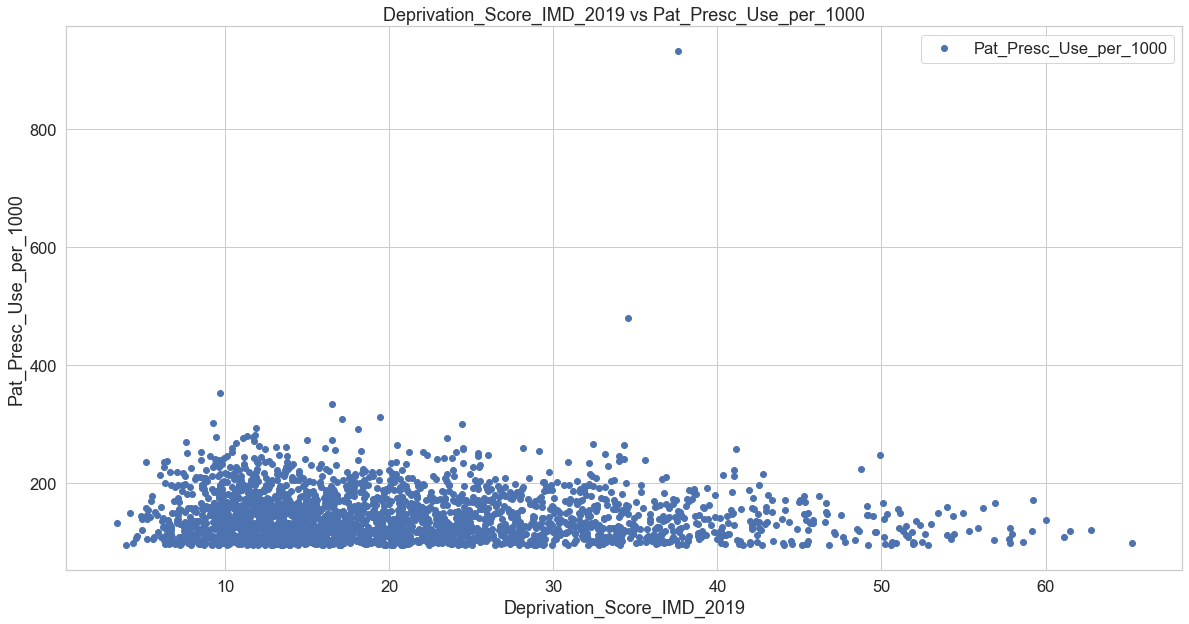

In [81]:
GP_Top_20_Pct_Pat_Presc_Use_per_1000.plot(x='Deprivation_Score_IMD_2019', y='Pat_Presc_Use_per_1000', style='o')  
plt.title('Deprivation_Score_IMD_2019 vs Pat_Presc_Use_per_1000')  
plt.xlabel('Deprivation_Score_IMD_2019')  
plt.ylabel('Pat_Presc_Use_per_1000')  
plt.show()

In [82]:
X = GP_Top_20_Pct_Pat_Presc_Use_per_1000['Deprivation_Score_IMD_2019'].values.reshape(-1,1)
y = GP_Top_20_Pct_Pat_Presc_Use_per_1000['Pat_Presc_Use_per_1000'].values.reshape(-1,1)

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [84]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression()

In [85]:
#To retrieve the intercept:
print(regressor.intercept_)

#For retrieving the slope:
print(regressor.coef_)

[148.621028]
[[-0.27697359]]


In [86]:
y_pred = regressor.predict(X_test)

In [87]:
actual_vs_predicted = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
actual_vs_predicted

,Actual,Predicted
0,207.68,146.233823
1,113.03,144.236457
2,102.71,142.981162
3,269.59,146.511180
4,107.05,146.085508
...,...,...
493,109.42,141.785066
494,155.82,134.485414
495,109.88,146.432421
496,143.11,144.027172


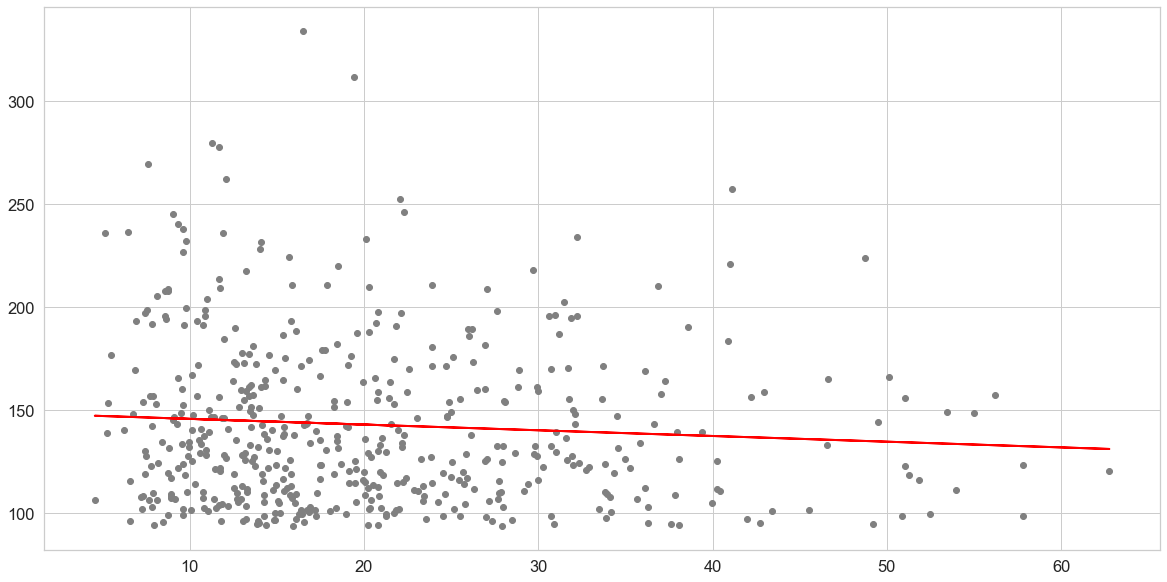

In [89]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()


In [90]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 31.094239132250326
Mean Squared Error: 1541.9732589793189
Root Mean Squared Error: 39.26796733954177


#### Logisitcal regression - [TOP 20% GPs for using POMI Prescriptions service per capita] Deprivation_Score_IMD_2019 vs Pat_Presc_Use_per_1000


The Median deprivation score for GPs is: 21


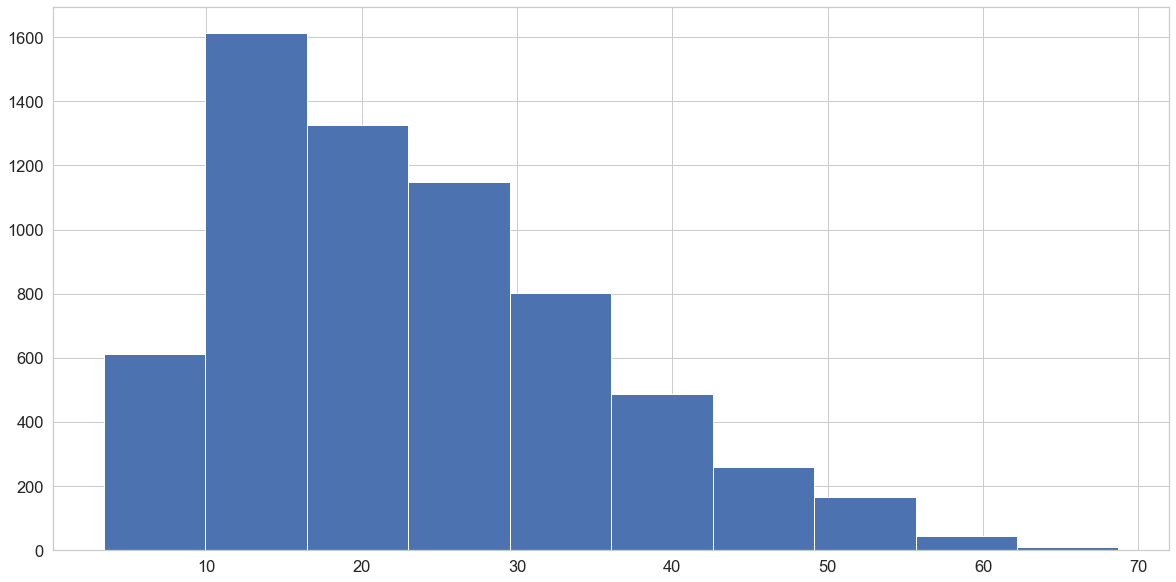

In [91]:
GP_POMI_IMD.Deprivation_Score_IMD_2019.hist()
print("The Median deprivation score for GPs is:", int(GP_POMI_IMD.Deprivation_Score_IMD_2019.median()))

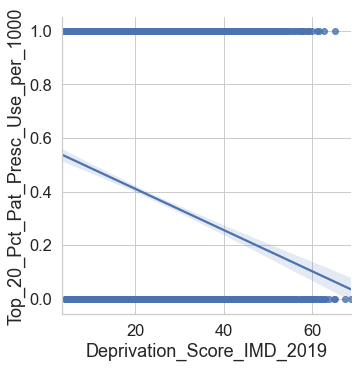

In [94]:
sns.lmplot(x='Deprivation_Score_IMD_2019',y='Top_20_Pct_Pat_Presc_Use_per_1000',data=GP_POMI_IMD)


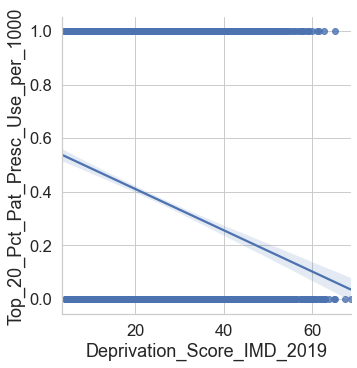

In [97]:
sns.lmplot(x='Deprivation_Score_IMD_2019',y='Top_20_Pct_Pat_Presc_Use_per_1000',data=GP_POMI_IMD)


/Users/mary.amanuel/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0    3981
1    2490
Name: Top_20_Pct_Pat_Presc_Use_per_1000, dtype: int64

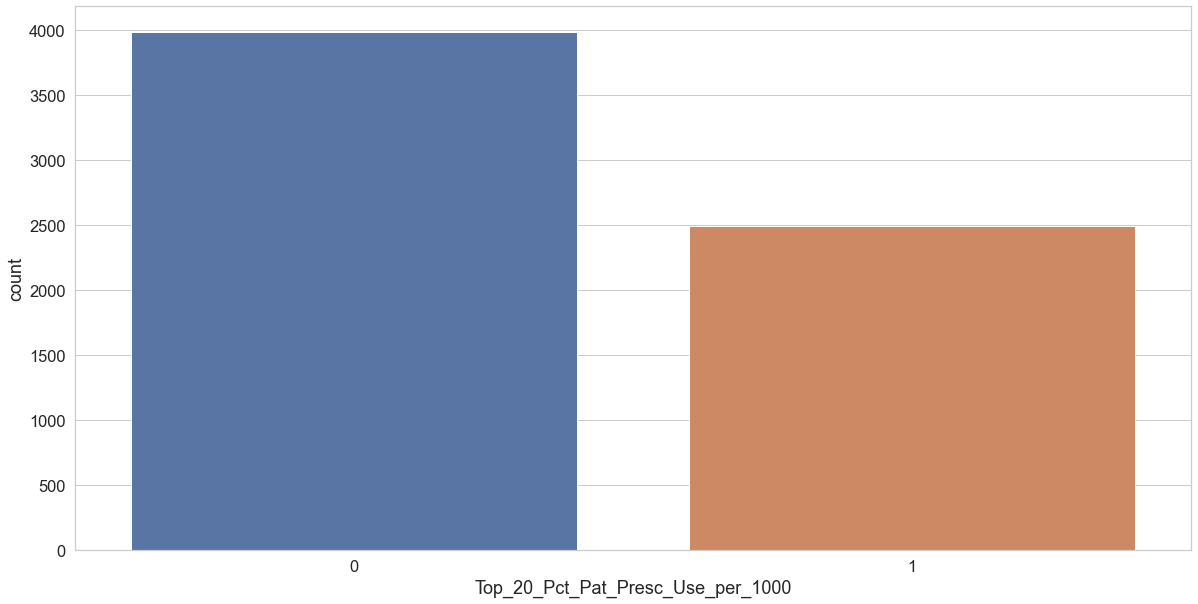

In [98]:
sns.countplot('Top_20_Pct_Pat_Presc_Use_per_1000',data=GP_POMI_IMD)
GP_POMI_IMD['Top_20_Pct_Pat_Presc_Use_per_1000'].value_counts()

In [99]:
LOGR_MODEL = GP_POMI_IMD[['Deprivation_Score_IMD_2019', 'Pat_Presc_Use','Top_20_Pct_Pat_Presc_Use_per_1000', 'Pat_Presc_Use_per_1000','patient_list_size']]

In [100]:
LOGR_MODEL 

,Deprivation_Score_IMD_2019,Pat_Presc_Use,Top_20_Pct_Pat_Presc_Use_per_1000,Pat_Presc_Use_per_1000,patient_list_size
0,68.721015,405.0,0,49.98,8104.0
1,67.407408,76.0,0,31.05,2448.0
2,65.248605,320.0,1,98.31,3255.0
3,65.104433,180.0,0,68.42,2631.0
4,64.957030,172.0,0,39.10,4399.0
...,...,...,...,...,...
6466,4.174575,1863.0,1,148.41,12553.0
6467,4.158261,767.0,0,84.32,9096.0
6468,4.151031,1016.0,0,69.57,14604.0
6469,3.933291,1344.0,1,94.76,14183.0


In [101]:
X = LOGR_MODEL.iloc[:,LOGR_MODEL .columns != 'Top_20_Pct_Pat_Presc_Use_per_1000']
y = LOGR_MODEL.Top_20_Pct_Pat_Presc_Use_per_1000


In [102]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.20, random_state=5, stratify=y)

In [103]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

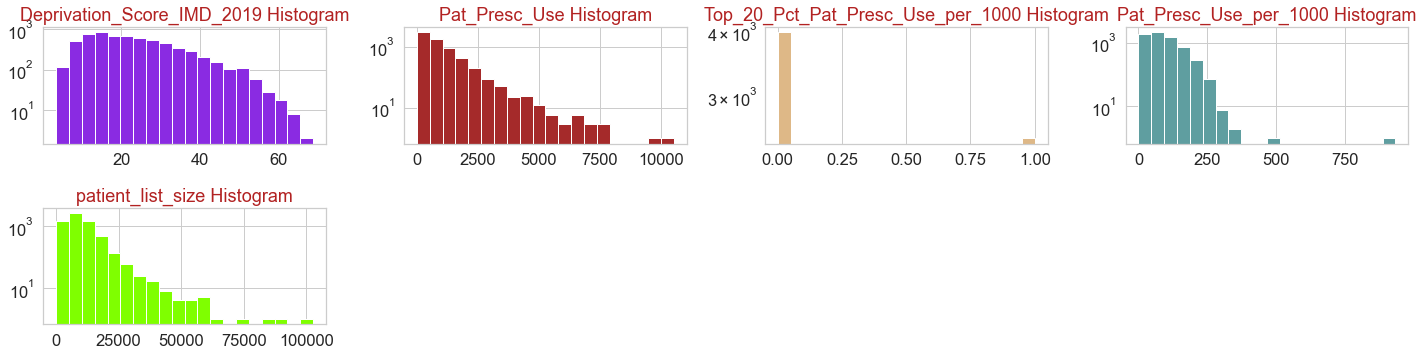

In [104]:
import matplotlib.colors as mcolors
colors = list(mcolors.CSS4_COLORS.keys())[10:]
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor=colors[i])
        ax.set_title(feature+" Histogram",color=colors[35])
        ax.set_yscale('log')
    fig.tight_layout() 
    plt.savefig('Histograms.png')
    plt.show()
draw_histograms(LOGR_MODEL,LOGR_MODEL.columns,8,4)

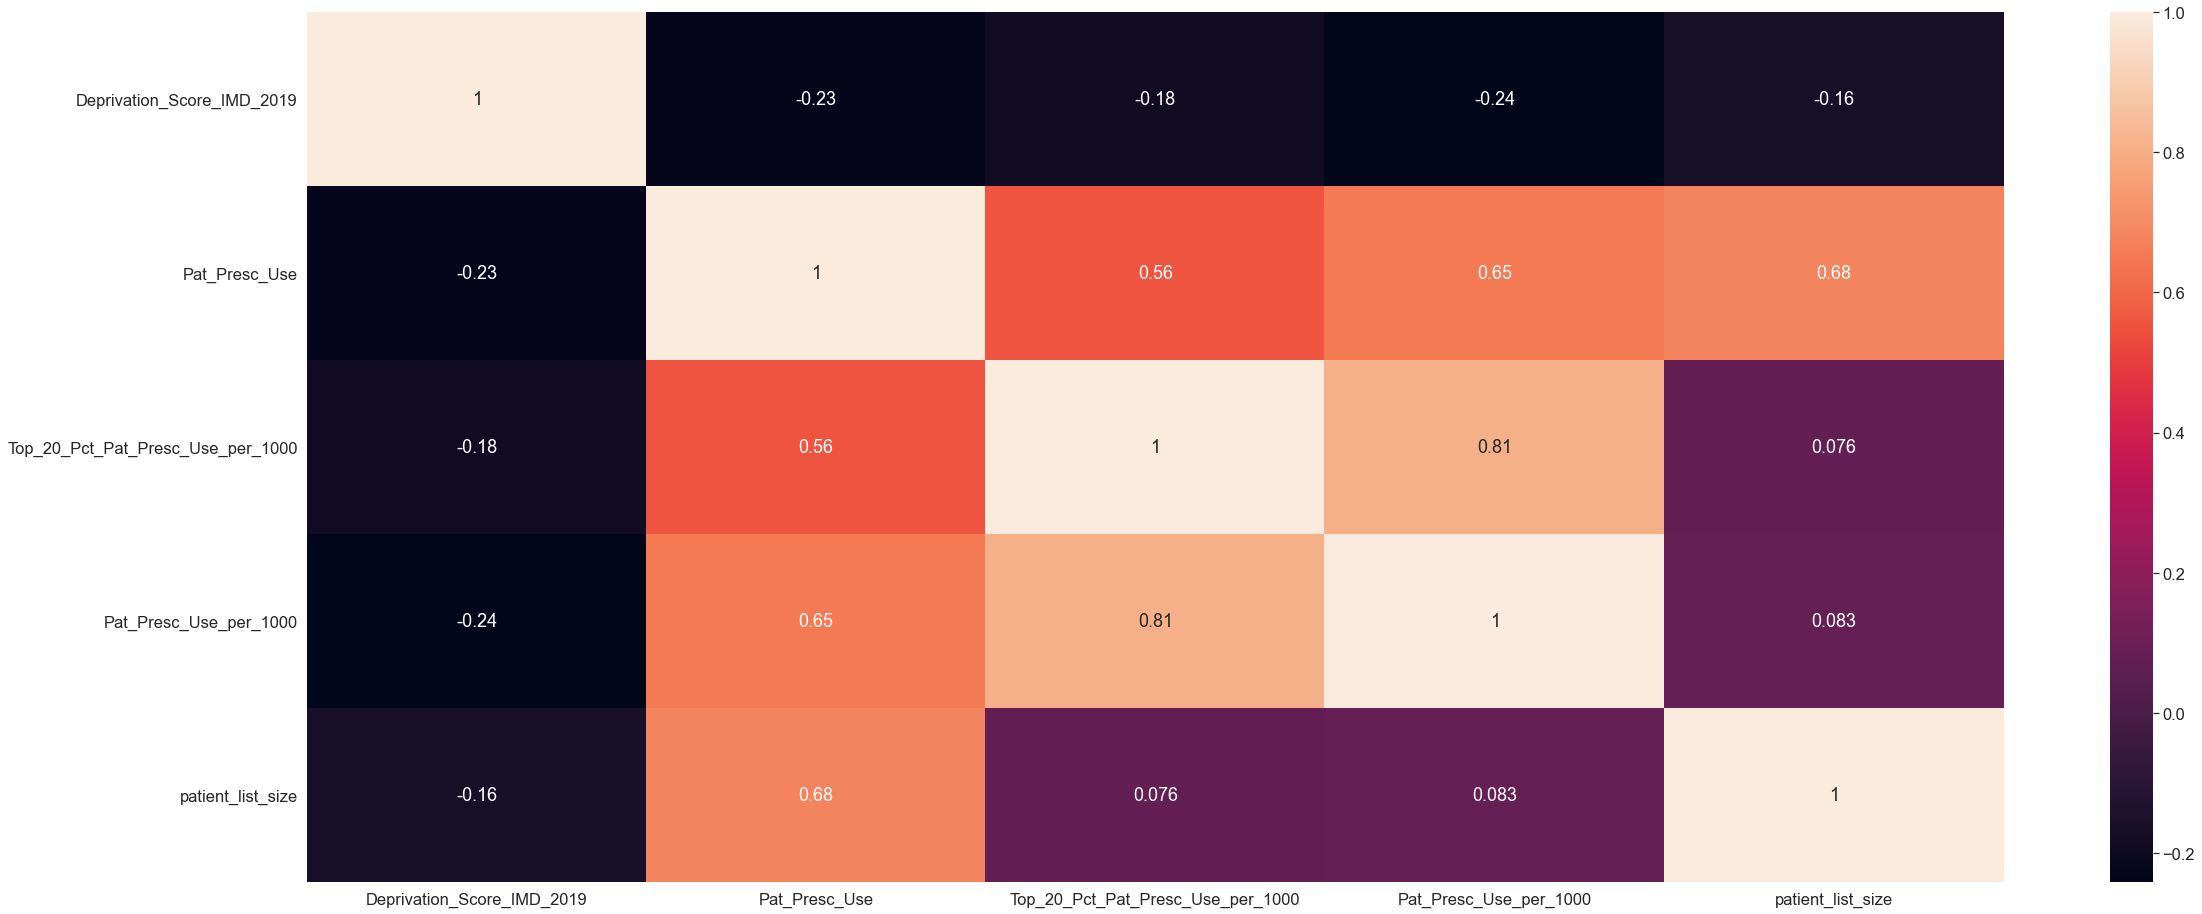

In [105]:
plt.figure(figsize = (38,16))
sns.heatmap(LOGR_MODEL.corr(), annot = True)
plt.savefig('heatmap.png')
plt.show()

In [106]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()




In [107]:
model.fit(X_train_scaled, y_train)


LogisticRegression()

In [108]:
 X.shape

(6471, 4)

In [109]:
y.shape

(6471,)

In [110]:
from sklearn.metrics import accuracy_score

train_acc = model.score(X_train_scaled, y_train)
print("The Accuracy for Training Set is {}".format(train_acc*100))

The Accuracy for Training Set is 99.80680061823803


In [112]:
 print(classification_report(y_test, y_pred))


NameError: name 'classification_report' is not defined

In [111]:
 from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png')

ValueError: Found input variables with inconsistent numbers of samples: [1295, 498]

In [113]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

/Users/mary.amanuel/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


         Current function value: 0.000001
         Iterations: 35
                                  Results: Logit
Model:              Logit                             Pseudo R-squared: 1.000     
Dependent Variable: Top_20_Pct_Pat_Presc_Use_per_1000 AIC:              8.0116    
Date:               2022-01-24 09:39                  BIC:              35.1120   
No. Observations:   6471                              Log-Likelihood:   -0.0058223
Df Model:           3                                 LL-Null:          -4312.0   
Df Residuals:       6467                              LLR p-value:      0.0000    
Converged:          0.0000                            Scale:            1.0000    
No. Iterations:     35.0000                                                       
----------------------------------------------------------------------------------
                               Coef.  Std.Err.    z    P>|z|    [0.025     0.975] 
-------------------------------------------------------

/Users/mary.amanuel/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
